In [1]:
# runs smoothly from start
# correlation histograms, scatter plots, pearson and spearman for positive only trained models on the largest 20615
# CONCLUSIONS: these models had shittier predictions than the pos+neg random models (except one model had better fold change) so decided
#              to go back to random data
# useful, streamlined correlation code here taken from correlations_random20615

In [2]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

mac_val1='/home/azstephe/liverRegression/regression_liver/data/splits/val1/macaque_liver_VAL.narrowPeak' 

mac_val2='/home/azstephe/liverRegression/regression_liver/data/splits/val2/macaque_liver_VAL.narrowPeak' 

mac_val3='/home/azstephe/liverRegression/regression_liver/data/splits/val3/macaque_liver_VAL.narrowPeak'

def pearson_spearman(x, y):
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")

    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def scatter(x, y):
    plt.figure(figsize=(8, 8))
    plt.axis([0, 4, 0, 4])
    plt.scatter(x, y, alpha=0.2)
    plt.plot([0, 4], [0, 4], color='red', linestyle='--', label='y = x')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('Scatter Plot of True vs Predicted Values')
    plt.grid(True)
    plt.show()

def histogram(pred_df, name):
    plt.hist(pred_df, bins=50)
    plt.xlabel(f'Values for {name}')
    plt.xlim(1, 4)
    plt.ylabel('Count')
    plt.title(f'Histogram of {name} Values')
    plt.show()

"""
what was I doing? Tried to remake something I've already written so just ignore this function and the first few cells
"""
def make_df(species, predictions, val1, val2, val3=None):
    pred_df = pd.read_csv(predictions, header=None).rename(columns={0: f'{species}_pred'})
    val1_df = pd.read_csv(val1, header=None, delim_whitespace=True)
    val2_df = pd.read_csv(val2, header=None, delim_whitespace=True)

    if val3 is not None:
        val3_df = pd.read_csv(val3, header=None, delim_whitespace=True)
        val3_len = 2 * len(val3_df)
    else:
        val3_df = pd.DataFrame()
        val3_len = 0

    val1_len = 2 * len(val1_df)
    val2_len = 2 * len(val2_df)

    # Double and sort val1 and val2
    doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)

    # Handle val3 doubling only if it exists
    if not val3_df.empty:
        doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_true_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df], axis=0).reset_index(drop=True)
    else:
        doubled_true_combined = pd.concat([doubled_val1_df, doubled_val2_df], axis=0).reset_index(drop=True)

    # Slice predictions
    pred_val1_df = pred_df.head(val1_len)
    pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
    pred_val3_df = pred_df.tail(val3_len) if val3_len > 0 else pd.DataFrame()

    # Concatenate predictions only if val3 exists
    pred_combined = pd.concat([pred_val1_df, pred_val2_df, pred_val3_df], axis=0).reset_index(drop=True)

    # Ensure pred_df length matches doubled_true_combined
    true_pred = pd.concat([doubled_true_combined, pred_combined], axis=1).rename(
        columns={4: f'{species}_true', 3: f'{species}_peak'}
    )

    return (true_pred, val1_len, val2_len, val3_len)

mac_df, _, _, _ = make_df('macaque','/home/azstephe/liverRegression/regression_liver/data/model_outputs/bazc1enn/activations_macaque_VAL.csv', '/home/azstephe/liverRegression/regression_liver/data/splits/val1/macaque_liver_VAL.narrowPeak', '/home/azstephe/liverRegression/regression_liver/data/splits/val2/macaque_liver_VAL.narrowPeak', '/home/azstephe/liverRegression/regression_liver/data/splits/val3/macaque_liver_VAL.narrowPeak')

In [3]:
mac_df

,0,1,2,macaque_peak,macaque_true,macaque_pred
0,chr1,2173927,2174427,peak18832,-1.000000,0.883537
1,chr1,2173927,2174427,peak18832,-1.000000,0.769411
2,chr1,4475693,4476193,peak18830,-1.000000,0.216059
3,chr1,4475693,4476193,peak18830,-1.000000,0.230362
4,chr1,7225407,7225907,peak18821,-1.000000,0.264506
...,...,...,...,...,...,...
17235,chr4,80225597,80226097,peak1309,3.469201,1.831790
17236,chr8,16384022,16384522,peak1236,3.494095,2.370341
17237,chr8,16384022,16384522,peak1236,3.494095,2.372957
17238,chr20,56120270,56120770,peak551,3.527422,0.920549


In [4]:
mouse_df, pos_len, neg_len, _ = make_df('mouse', '/home/azstephe/liverRegression/regression_liver/data/model_outputs/r5ibvwem/activations_mouse_VAL.csv',
       '/home/azstephe/regression_liver/data/sorted_log_20615/splits/mousePos/mouse_liver_VAL.narrowPeak', 
       '/home/azstephe/regression_liver/data/splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed'
       )

In [5]:
predictions = '/home/azstephe/liverRegression/regression_liver/data/model_outputs/r5ibvwem/activations_mouse_VAL.csv'
pd.read_csv(predictions, header=None).rename(columns={0: f'mouse_pred'})

,mouse_pred
0,2.282786
1,2.283218
2,2.247115
3,2.254085
4,2.265083
...,...
35669,2.353988
35670,2.266307
35671,2.255883
35672,2.261818


In [6]:
mouse_df[:pos_len]

,0,1,2,mouse_peak,mouse_true,mouse_pred
0,chr8,10402792,10403292,peak19441,1.577167,2.282786
1,chr8,10402792,10403292,peak19441,1.577167,2.283218
2,chr8,104570606,104571106,peak20231,1.576674,2.247115
3,chr8,104570606,104571106,peak20231,1.576674,2.254085
4,chr8,107881566,107882066,peak20248,1.576457,2.265083
...,...,...,...,...,...,...
3755,chr8,20297277,20297777,peak19548,3.693141,2.258836
3756,chr8,20549919,20550419,peak19552,3.791635,2.308583
3757,chr8,20549919,20550419,peak19552,3.791635,2.303993
3758,chr8,20122006,20122506,peak19546,3.904036,2.260415


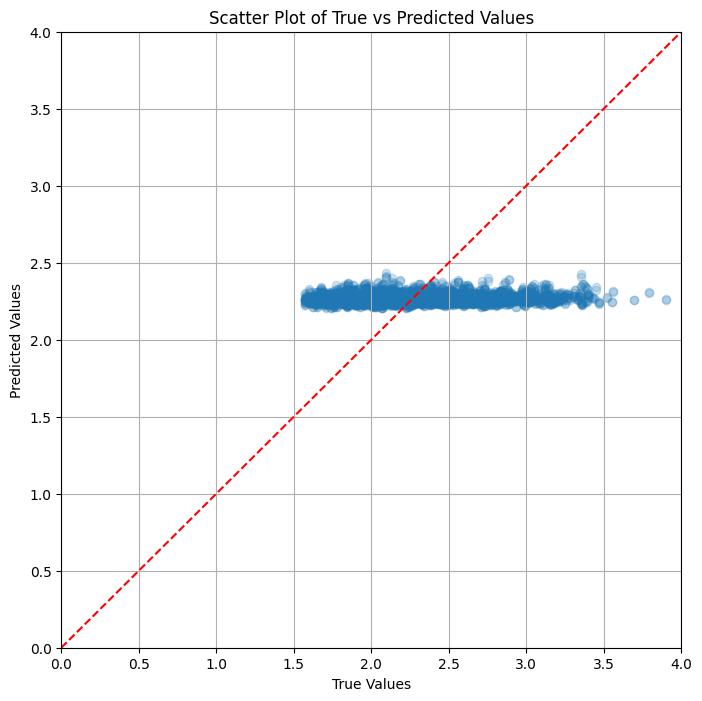

Pearson correlation coefficient: 0.1024, p-value: 3.102e-10
Spearman correlation coefficient: 0.0957, p-value: 4.047e-09


In [7]:
x = mouse_df[:pos_len]['mouse_true']
y = mouse_df[:pos_len]['mouse_pred']


plt.figure(figsize=(8, 8))
plt.axis([0, 4, 0, 4])
plt.scatter(x, y, alpha=0.2)
plt.plot([0, 4], [0, 4], color='red', linestyle='--', label='y = x')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Values')
plt.grid(True)
plt.show()
pearson_spearman(x, y)

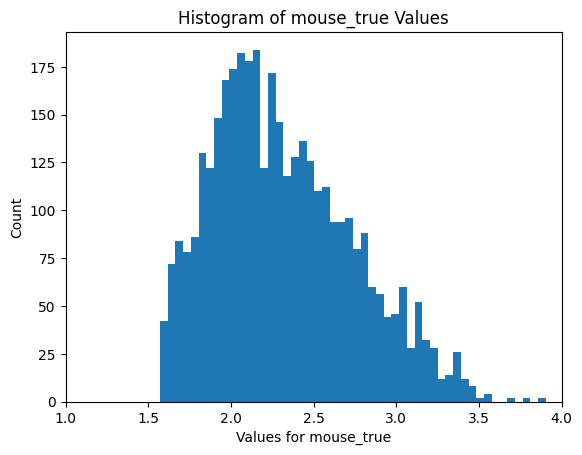

In [8]:
histogram(x, 'mouse_true')

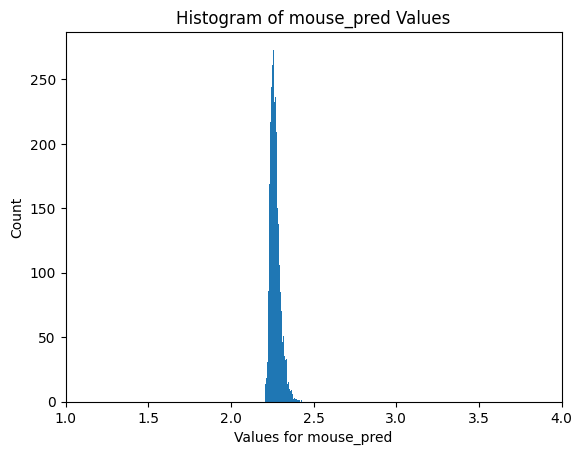

In [9]:
histogram(y, 'mouse_pred')

In [10]:
mac_df, val1_len, val2_len, val3_len = make_df('mac', '/home/azstephe/liverRegression/regression_liver/data/model_outputs/r5ibvwem/activations_macaque_VAL.csv',
       mac_val1, mac_val2, mac_val3
       )

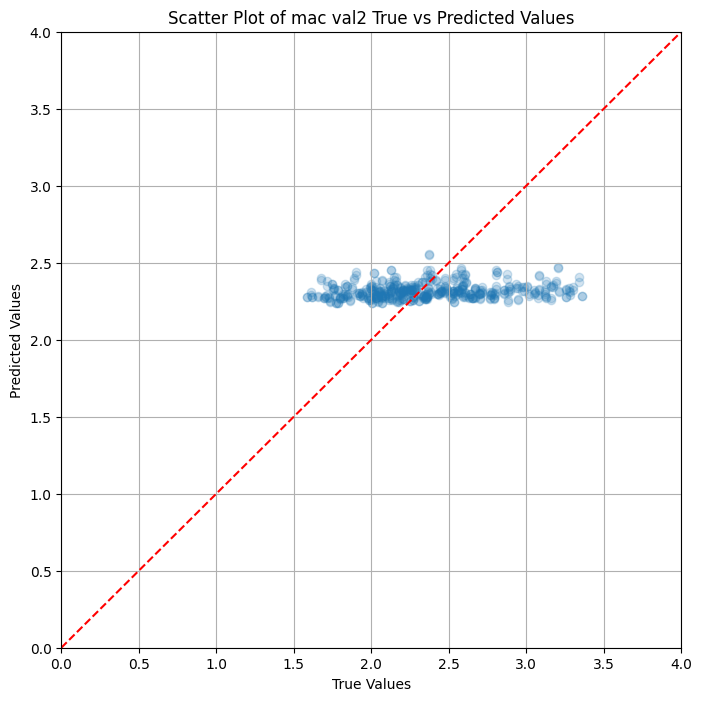

Pearson correlation coefficient: 0.1708, p-value: 0.0001866
Spearman correlation coefficient: 0.1947, p-value: 1.975e-05


In [11]:
x = mac_df[val1_len:val1_len+val2_len]['mac_true']
y = mac_df[val1_len:val1_len+val2_len]['mac_pred']

plt.figure(figsize=(8, 8))
plt.axis([0, 4, 0, 4])
plt.scatter(x, y, alpha=0.2)
plt.plot([0, 4], [0, 4], color='red', linestyle='--', label='y = x')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of mac val2 True vs Predicted Values')
plt.grid(True)
plt.show()
pearson_spearman(x, y)

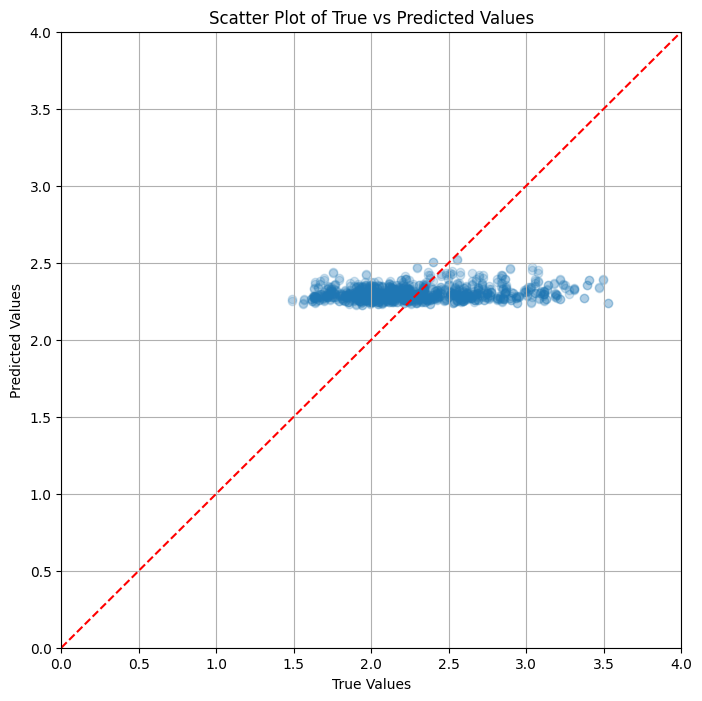

Pearson correlation coefficient: 0.1781, p-value: 3.008e-09
Spearman correlation coefficient: 0.1394, p-value: 3.688e-06


In [12]:
x = mac_df.tail(val3_len)['mac_true']
y = mac_df.tail(val3_len)['mac_pred']
scatter(x, y)
pearson_spearman(x, y)

In [13]:
mac_df, val1_len, val2_len, val3_len = make_df('mac', '/home/azstephe/liverRegression/regression_liver/data/model_outputs/ylfry2wl/activations_macaque_VAL.csv',
       mac_val1, mac_val2, mac_val3
       )

In [35]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np


pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/ylfry2wl/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

def scatter(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='red', linestyle='--', label='y = x')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of {group} True vs Predicted Values')
    plt.grid(True)
    plt.show()

def plotscatter():
    scatter(pred_val1_df, doubled_val1_df, 'val1')
    scatter(pred_val2_df, doubled_val2_df, 'val2')
    scatter(pred_val3_df, doubled_val3_df, 'val3')

def histogram(pred_df, name, status):
    plt.hist(pred_df, bins=50)
    plt.xlim(1, 4)
    plt.xlabel(f'Values for {name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of {status} Values')
    plt.show()

def ploth_true():
    histogram(val1_df, 'true val1', 'true')
    histogram(val2_df, 'true val2', 'true')
    histogram(val3_df, 'true val3', 'true')

def ploth():
    histogram(pred_val1_df, 'val1', 'predicted')
    histogram(pred_val2_df, 'val2', 'predicted')
    histogram(pred_val3_df, 'val3', 'predicted')
    
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

def correlate():
    correlations(pred_df, doubled_combined, 'all')
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')
    # correlations(pred_df.tail(neg_len*2), doubled_ndf, 'negative')

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

    
def wilcox():
    wilcoxon(pred_val1_df, pred_val2_df)
    wilcoxon(pred_val1_df, pred_val3_df)



Pearson correlation coefficient for all: 0.2836, p-value: 2.366e-316
Spearman correlation coefficient for all: 0.2513, p-value: 1.517e-246
Pearson correlation coefficient for val2: 0.1221, p-value: 0.007783
Spearman correlation coefficient for val2: 0.1353, p-value: 0.003168
Pearson correlation coefficient for val3: 0.1887, p-value: 3.132e-10
Spearman correlation coefficient for val3: 0.1634, p-value: 5.451e-08


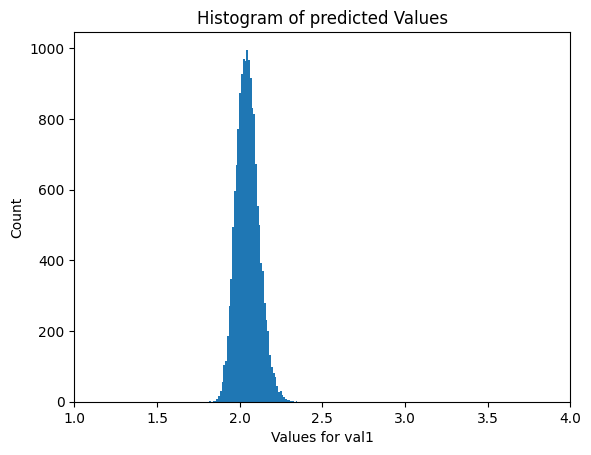

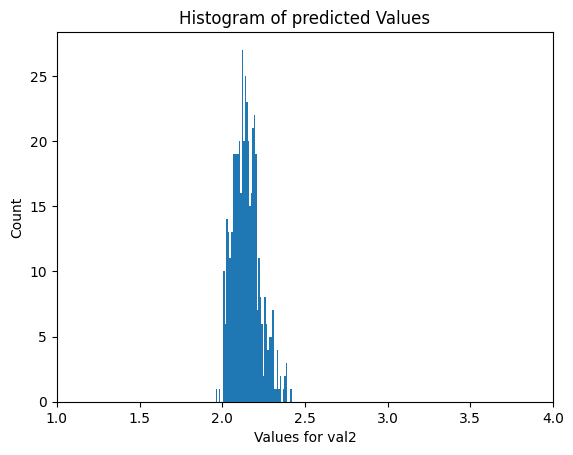

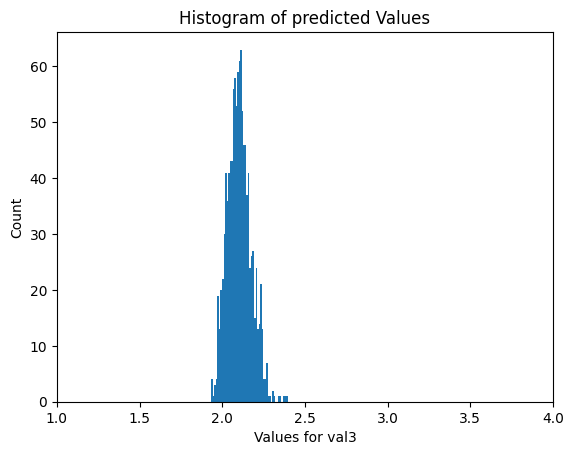

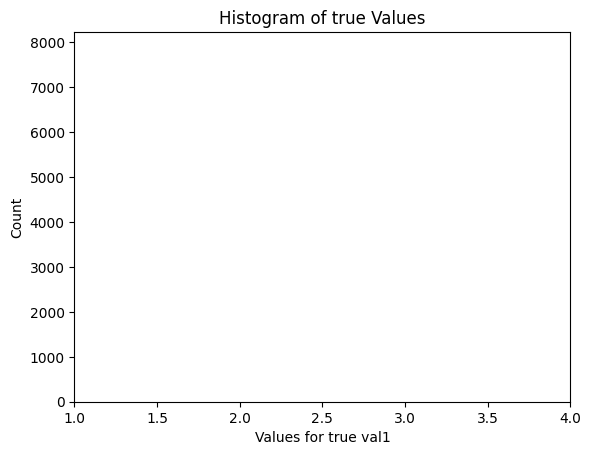

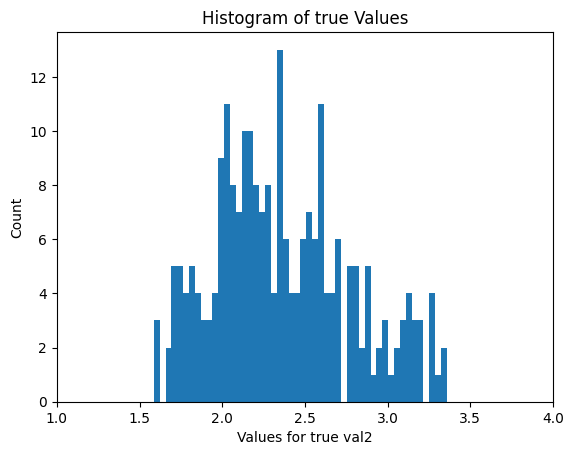

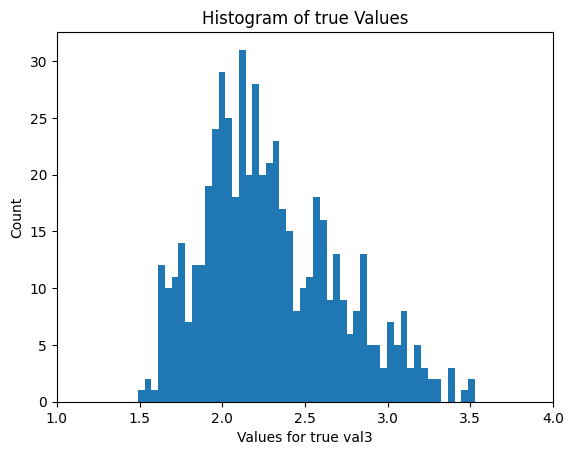

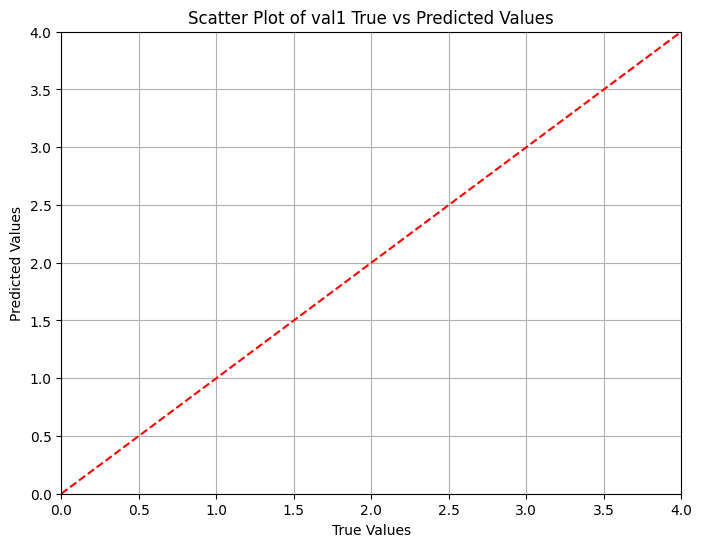

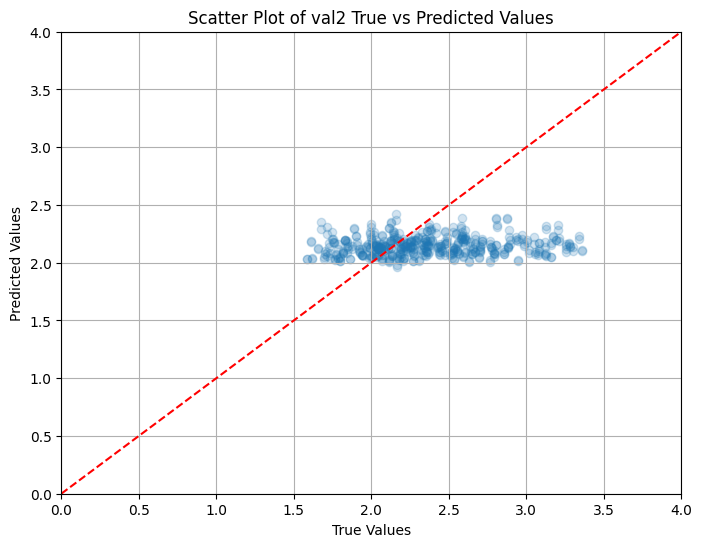

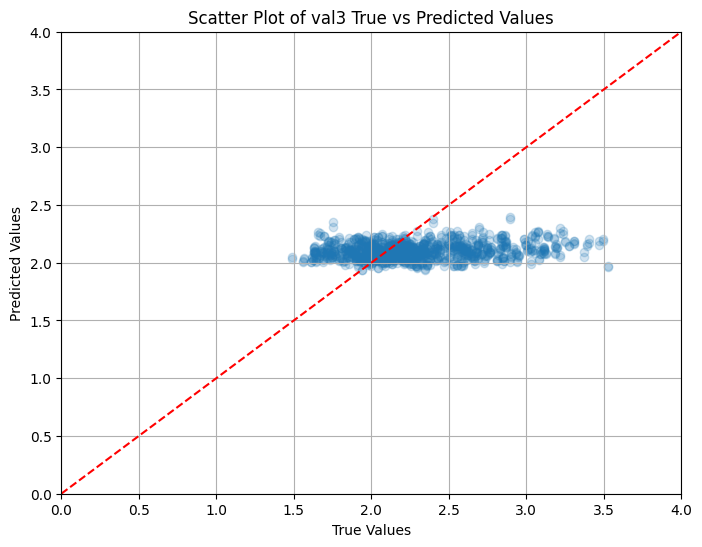

In [15]:
correlate()
ploth()
ploth_true()
plotscatter()

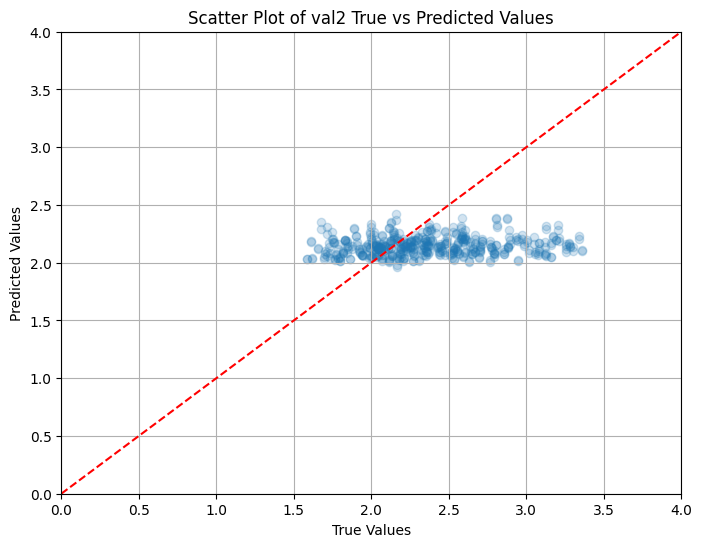

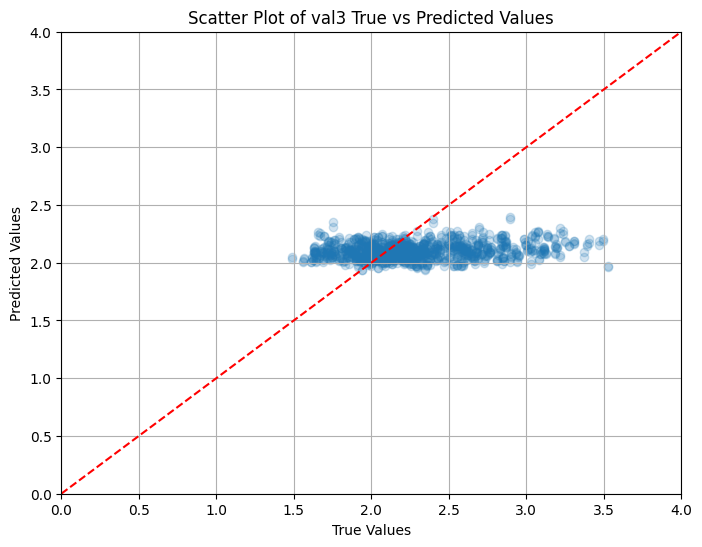

Pearson correlation coefficient: 0.1221, p-value: 0.007783
Spearman correlation coefficient: 0.1353, p-value: 0.003168
Pearson correlation coefficient: 0.1887, p-value: 3.132e-10
Spearman correlation coefficient: 0.1634, p-value: 5.451e-08


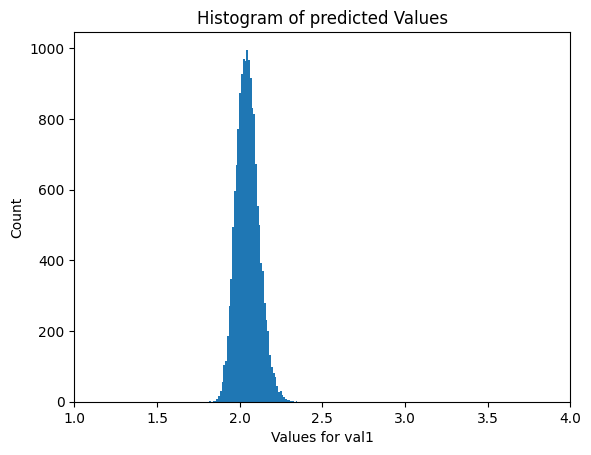

In [36]:
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/ylfry2wl/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

if len(doubled_combined)!=len(pred_df):
    print("Incorrect lengths")

scatter(pred_val2_df[0], doubled_val2_df, 'val2')
scatter(pred_val3_df[0], doubled_val3_df, 'val3')
pearson_spearman(pred_val2_df[0], doubled_val2_df) 
pearson_spearman(pred_val3_df[0], doubled_val3_df) 
histogram(pred_val1_df, "val1", "predicted")
   

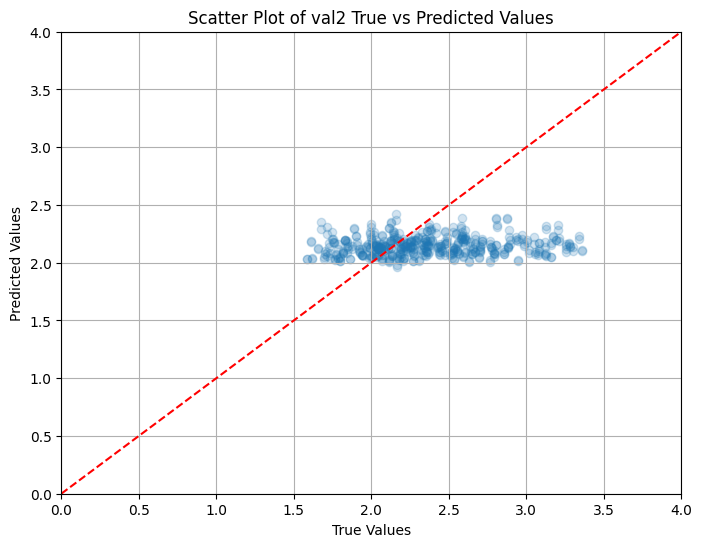

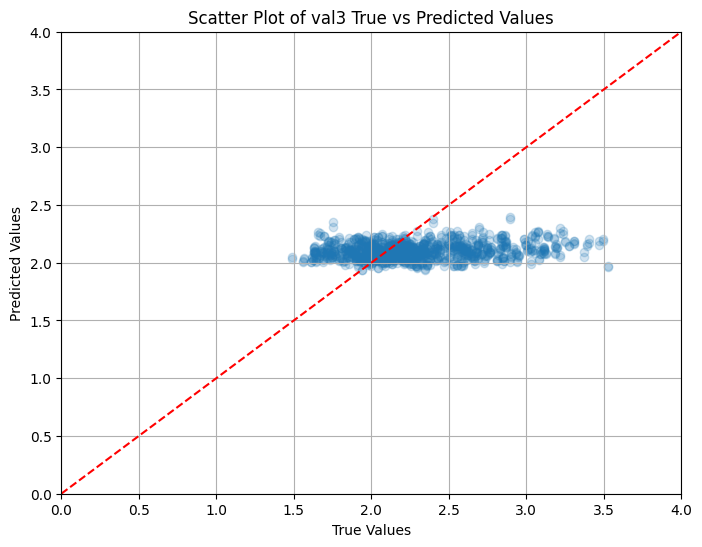

Pearson correlation coefficient: 0.1221, p-value: 0.007783
Spearman correlation coefficient: 0.1353, p-value: 0.003168
Pearson correlation coefficient: 0.1887, p-value: 3.132e-10
Spearman correlation coefficient: 0.1634, p-value: 5.451e-08


In [17]:
scatter(pred_val2_df[0], doubled_val2_df, 'val2')
scatter(pred_val3_df[0], doubled_val3_df, 'val3')
pearson_spearman(pred_val2_df[0], doubled_val2_df) 
pearson_spearman(pred_val3_df[0], doubled_val3_df) 

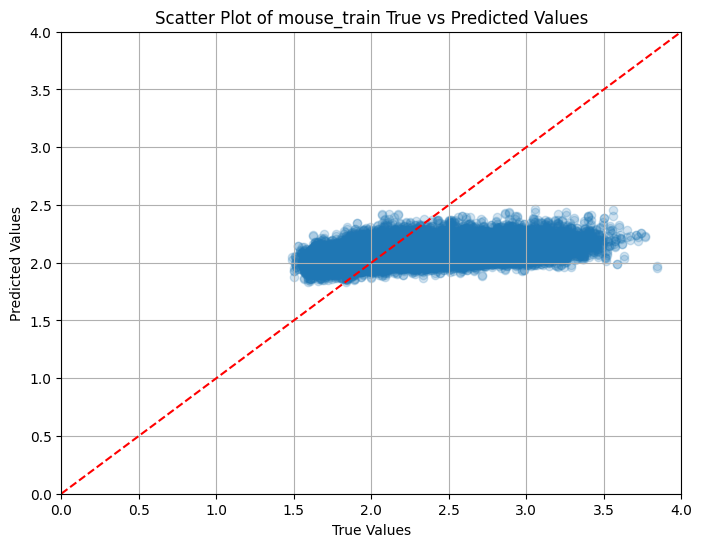

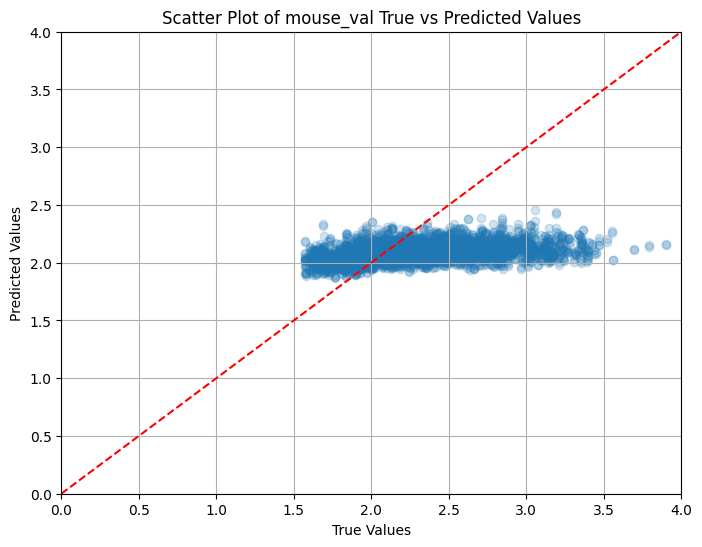

Pearson correlation coefficient: 0.4206, p-value: 0
Spearman correlation coefficient: 0.4155, p-value: 0
Pearson correlation coefficient: 0.3590, p-value: 8.648e-115
Spearman correlation coefficient: 0.3741, p-value: 3.438e-125


In [18]:
mouse_pred = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/ylfry2wl/activations_mouse_VAL_TRAIN_batch.csv', header=None, sep='\t')
mouse_train_real = pd.read_csv('/home/azstephe/regression_liver/data/sorted_log_20615/splits/mousePos/mouse_liver_TRAINONLY.narrowPeak', header=None, sep='\t')
mouse_val_real = pd.read_csv('/home/azstephe/regression_liver/data/sorted_log_20615/splits/mousePos/mouse_liver_VAL.narrowPeak', header=None, sep='\t')

mouse_val_real_double = pd.concat([mouse_val_real, mouse_val_real]).sort_index(kind='mergesort').reset_index(drop=True)
mouse_train_real_double = pd.concat([mouse_train_real, mouse_train_real]).sort_index(kind='mergesort').reset_index(drop=True)

mouse_val_pred = mouse_pred.head(len(mouse_val_real_double))
mouse_train_pred = mouse_pred.tail(len(mouse_train_real_double))

scatter(mouse_train_pred[0], mouse_train_real_double.iloc[:,4], 'mouse_train')
scatter(mouse_val_pred[0], mouse_val_real_double.iloc[:,4], 'mouse_val')

pearson_spearman(mouse_train_pred[0], mouse_train_real_double.iloc[:,4])
pearson_spearman(mouse_val_pred[0], mouse_val_real_double.iloc[:,4])

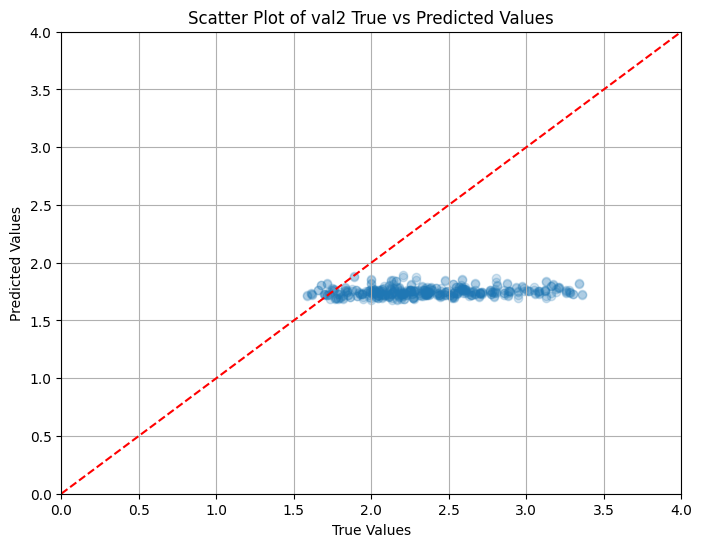

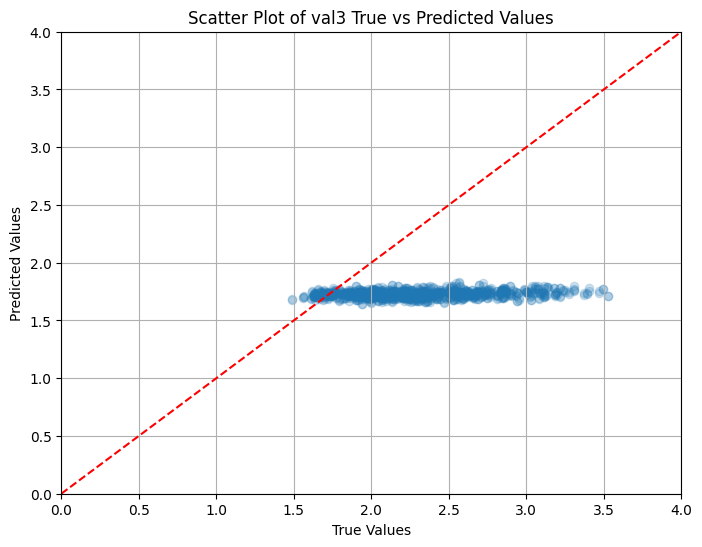

Pearson correlation coefficient: 0.1578, p-value: 0.0005666
Spearman correlation coefficient: 0.1874, p-value: 4.032e-05
Pearson correlation coefficient: 0.2097, p-value: 2.453e-12
Spearman correlation coefficient: 0.1747, p-value: 6.034e-09


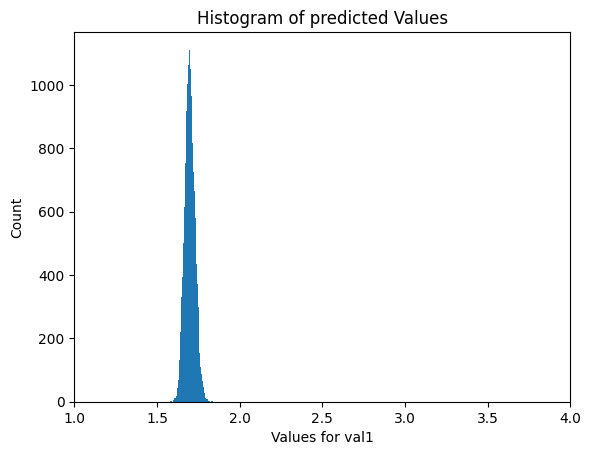

In [19]:
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/or2bctq6/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

if len(doubled_combined)!=len(pred_df):
    print("Incorrect lengths")

scatter(pred_val2_df[0], doubled_val2_df, 'val2')
scatter(pred_val3_df[0], doubled_val3_df, 'val3')
pearson_spearman(pred_val2_df[0], doubled_val2_df) 
pearson_spearman(pred_val3_df[0], doubled_val3_df) 
histogram(pred_val1_df, "val1", "predicted")

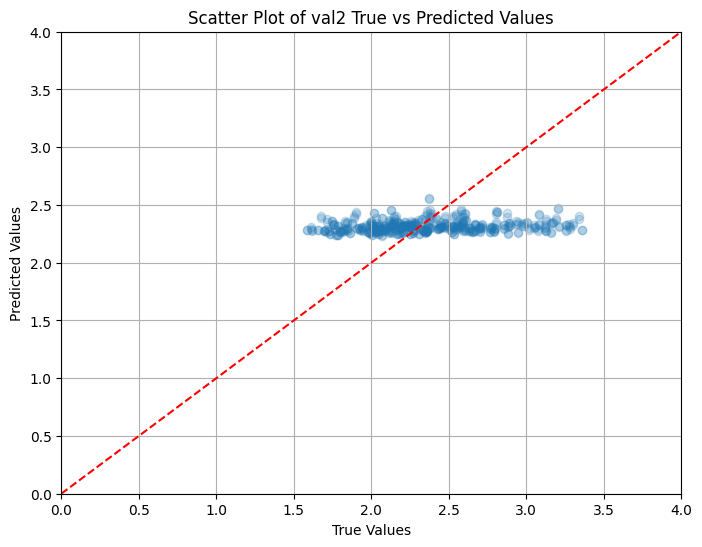

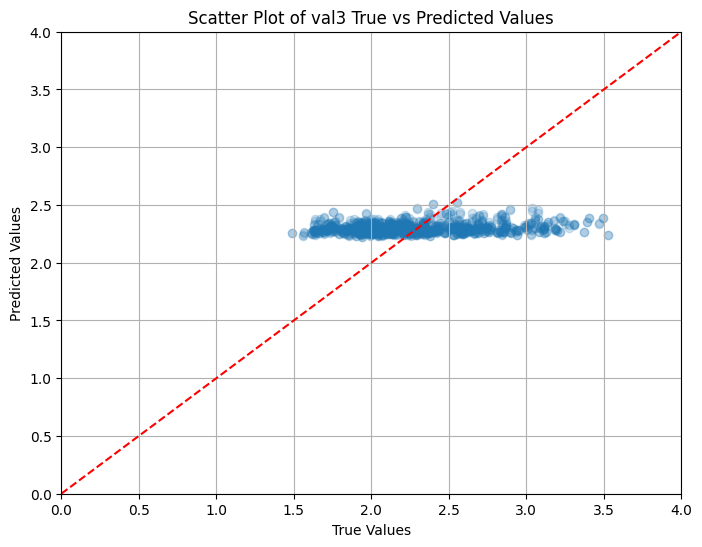

Pearson correlation coefficient: 0.1708, p-value: 0.0001866
Spearman correlation coefficient: 0.1947, p-value: 1.975e-05
Pearson correlation coefficient: 0.1781, p-value: 3.008e-09
Spearman correlation coefficient: 0.1394, p-value: 3.688e-06


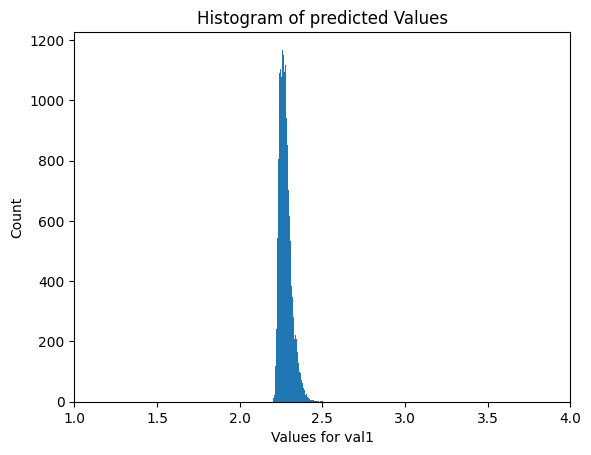

In [20]:
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/r5ibvwem/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

if len(doubled_combined)!=len(pred_df):
    print("Incorrect lengths")

scatter(pred_val2_df[0], doubled_val2_df, 'val2')
scatter(pred_val3_df[0], doubled_val3_df, 'val3')
pearson_spearman(pred_val2_df[0], doubled_val2_df) 
pearson_spearman(pred_val3_df[0], doubled_val3_df) 
histogram(pred_val1_df, "val1", "predicted")

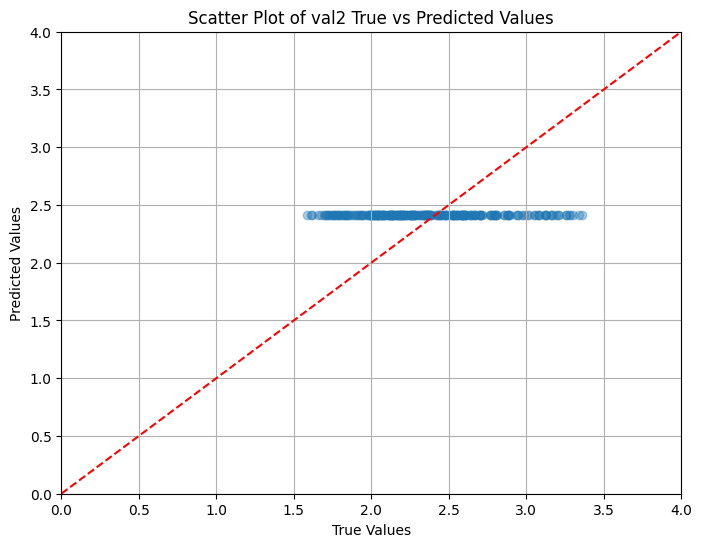

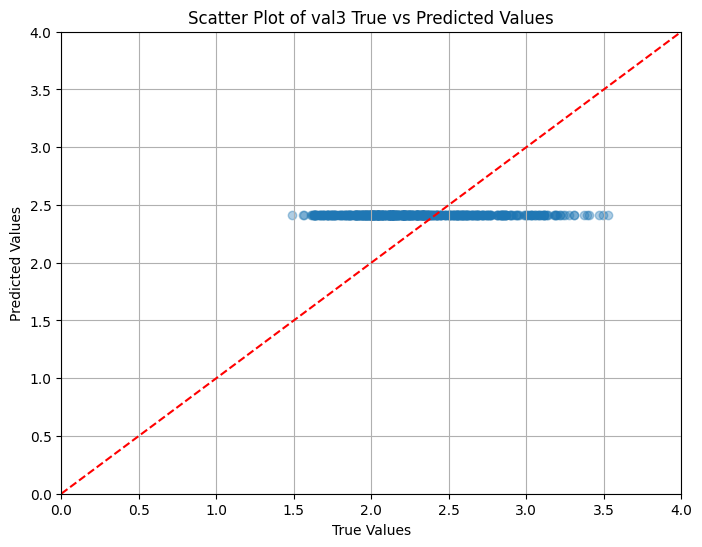

Pearson correlation coefficient: -0.0237, p-value: 0.6075
Spearman correlation coefficient: 0.0018, p-value: 0.9688
Pearson correlation coefficient: 0.0200, p-value: 0.5096
Spearman correlation coefficient: 0.0180, p-value: 0.5528


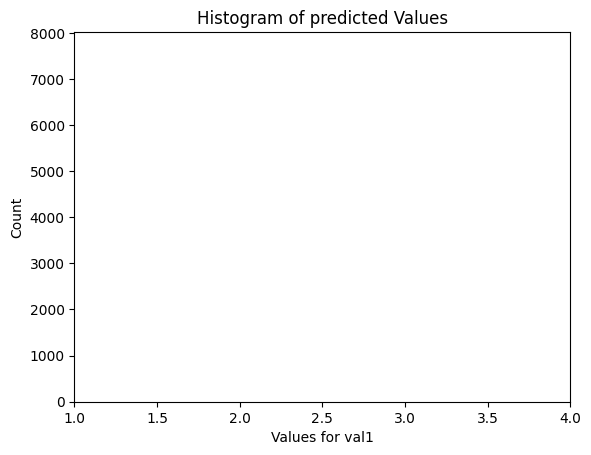

In [21]:
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/xnertk9j/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

if len(doubled_combined)!=len(pred_df):
    print("Incorrect lengths")

scatter(pred_val2_df[0], doubled_val2_df, 'val2')
scatter(pred_val3_df[0], doubled_val3_df, 'val3')
pearson_spearman(pred_val2_df[0], doubled_val2_df) 
pearson_spearman(pred_val3_df[0], doubled_val3_df) 
histogram(pred_val1_df, "val1", "predicted")

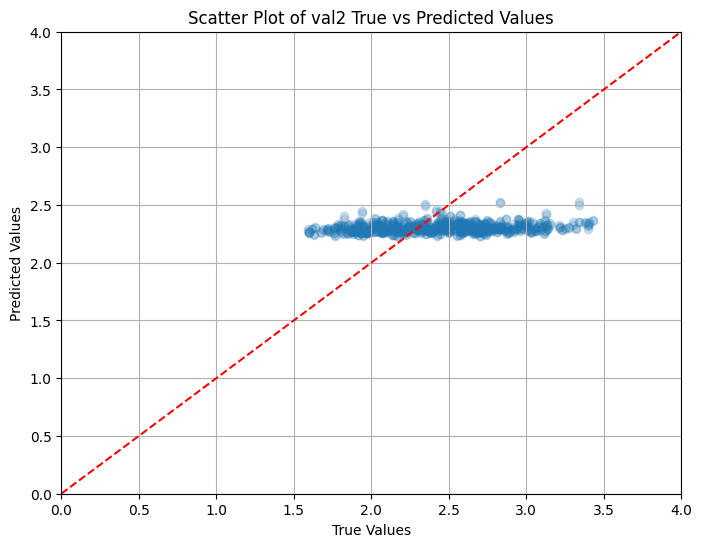

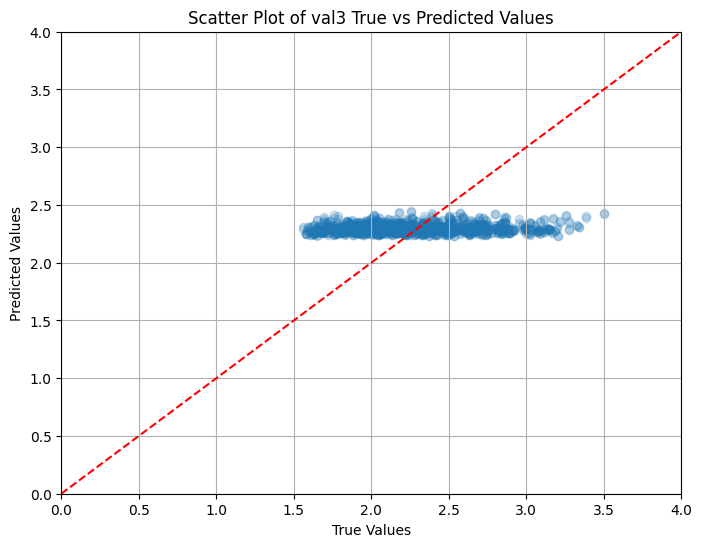

Pearson correlation coefficient: 0.1905, p-value: 5.69e-08
Spearman correlation coefficient: 0.1881, p-value: 8.325e-08
Pearson correlation coefficient: 0.1026, p-value: 0.0002158
Spearman correlation coefficient: 0.0776, p-value: 0.005182


In [22]:
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/r5ibvwem/activations_rat_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

if len(doubled_combined)!=len(pred_df):
    print("Incorrect lengths")

scatter(pred_val2_df[0], doubled_val2_df, 'val2')
scatter(pred_val3_df[0], doubled_val3_df, 'val3')
pearson_spearman(pred_val2_df[0], doubled_val2_df) 
pearson_spearman(pred_val3_df[0], doubled_val3_df)

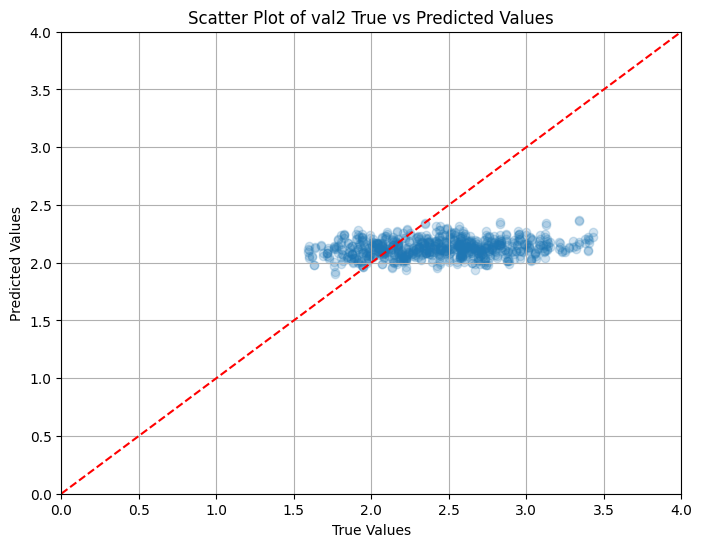

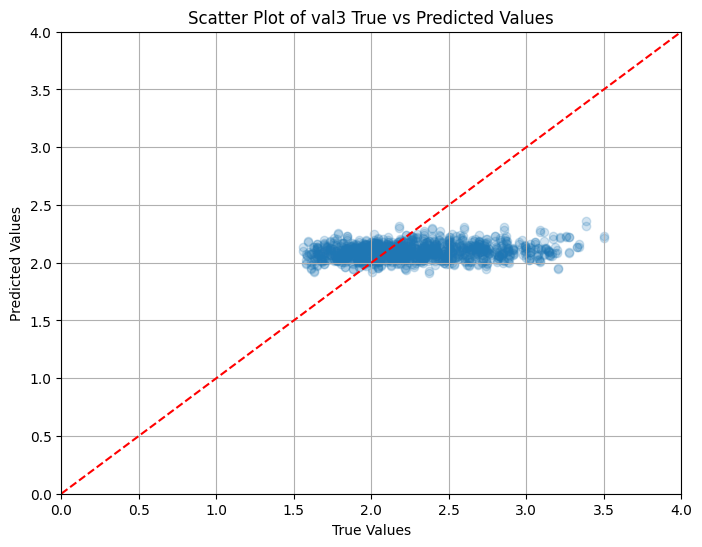

Pearson correlation coefficient: 0.1928, p-value: 3.877e-08
Spearman correlation coefficient: 0.1722, p-value: 9.598e-07
Pearson correlation coefficient: 0.1802, p-value: 6.331e-11
Spearman correlation coefficient: 0.1535, p-value: 2.801e-08


In [23]:
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/ylfry2wl/activations_rat_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

if len(doubled_combined)!=len(pred_df):
    print("Incorrect lengths")

scatter(pred_val2_df[0], doubled_val2_df, 'val2')
scatter(pred_val3_df[0], doubled_val3_df, 'val3')
pearson_spearman(pred_val2_df[0], doubled_val2_df) 
pearson_spearman(pred_val3_df[0], doubled_val3_df)

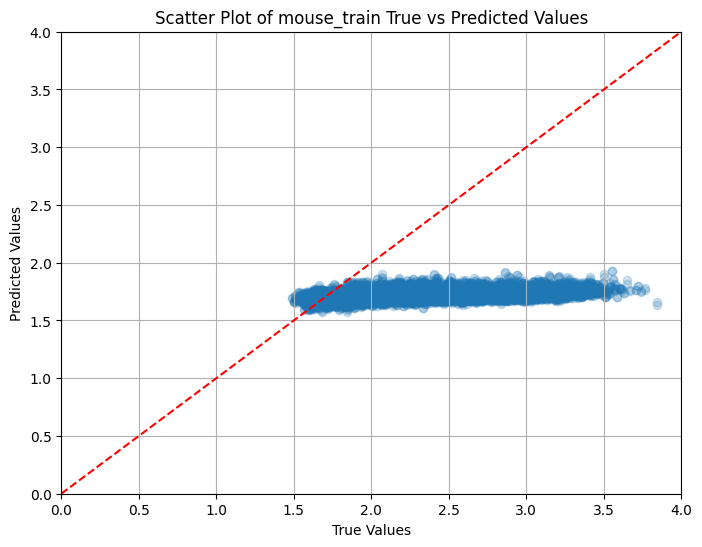

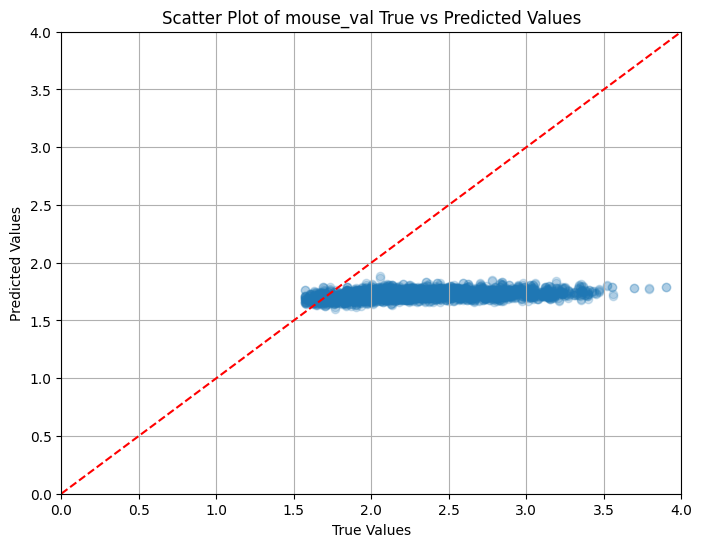

Pearson correlation coefficient: 0.4116, p-value: 0
Spearman correlation coefficient: 0.4049, p-value: 0
Pearson correlation coefficient: 0.3568, p-value: 2.562e-113
Spearman correlation coefficient: 0.3593, p-value: 5.978e-115


In [24]:
mouse_pred = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/or2bctq6/activations_mouse_VAL_TRAIN.csv', header=None, sep='\t')
mouse_train_real = pd.read_csv('/home/azstephe/regression_liver/data/sorted_log_20615/splits/mousePos/mouse_liver_TRAINONLY.narrowPeak', header=None, sep='\t')
mouse_val_real = pd.read_csv('/home/azstephe/regression_liver/data/sorted_log_20615/splits/mousePos/mouse_liver_VAL.narrowPeak', header=None, sep='\t')

mouse_val_real_double = pd.concat([mouse_val_real, mouse_val_real]).sort_index(kind='mergesort').reset_index(drop=True)
mouse_train_real_double = pd.concat([mouse_train_real, mouse_train_real]).sort_index(kind='mergesort').reset_index(drop=True)

mouse_val_pred = mouse_pred.head(len(mouse_val_real_double))
mouse_train_pred = mouse_pred.tail(len(mouse_train_real_double))

scatter(mouse_train_pred[0], mouse_train_real_double.iloc[:,4], 'mouse_train')
scatter(mouse_val_pred[0], mouse_val_real_double.iloc[:,4], 'mouse_val')

pearson_spearman(mouse_train_pred[0], mouse_train_real_double.iloc[:,4])
pearson_spearman(mouse_val_pred[0], mouse_val_real_double.iloc[:,4])

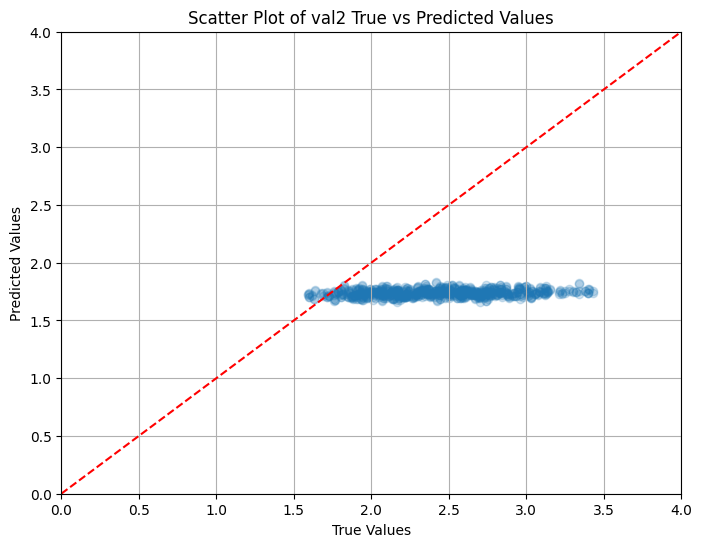

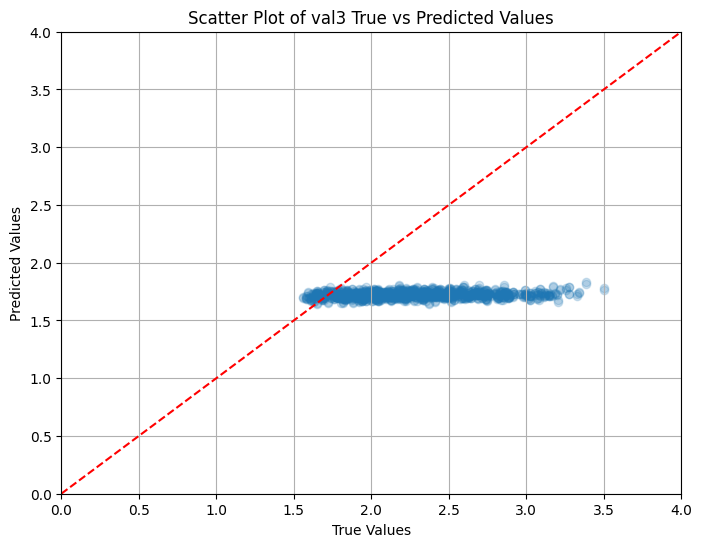

Pearson correlation coefficient: 0.1833, p-value: 1.784e-07
Spearman correlation coefficient: 0.1651, p-value: 2.652e-06
Pearson correlation coefficient: 0.1674, p-value: 1.323e-09
Spearman correlation coefficient: 0.1438, p-value: 1.998e-07


In [25]:
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/or2bctq6/activations_rat_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/rat_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

if len(doubled_combined)!=len(pred_df):
    print("Incorrect lengths")

scatter(pred_val2_df[0], doubled_val2_df, 'val2')
scatter(pred_val3_df[0], doubled_val3_df, 'val3')
pearson_spearman(pred_val2_df[0], doubled_val2_df) 
pearson_spearman(pred_val3_df[0], doubled_val3_df)

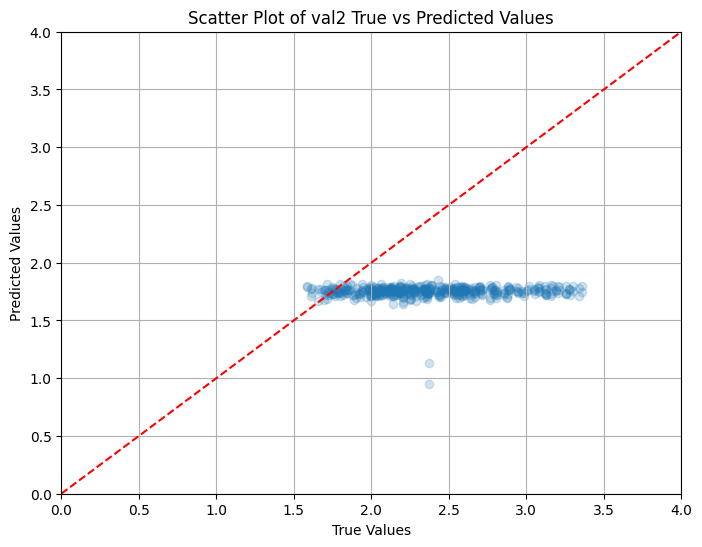

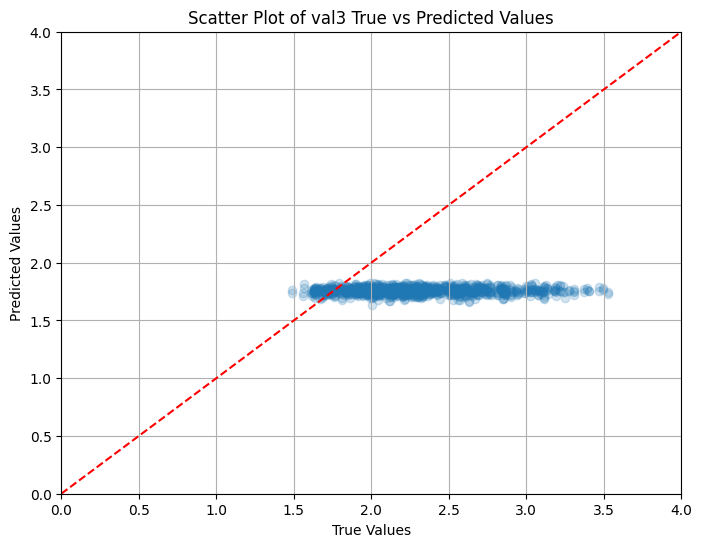

Pearson correlation coefficient: 0.0420, p-value: 0.3611
Spearman correlation coefficient: 0.0697, p-value: 0.1296
Pearson correlation coefficient: 0.0384, p-value: 0.2045
Spearman correlation coefficient: 0.0434, p-value: 0.151


In [26]:
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/381jh4pd/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

if len(doubled_combined)!=len(pred_df):
    print("Incorrect lengths")

scatter(pred_val2_df[0], doubled_val2_df, 'val2')
scatter(pred_val3_df[0], doubled_val3_df, 'val3')
pearson_spearman(pred_val2_df[0], doubled_val2_df) 
pearson_spearman(pred_val3_df[0], doubled_val3_df) 

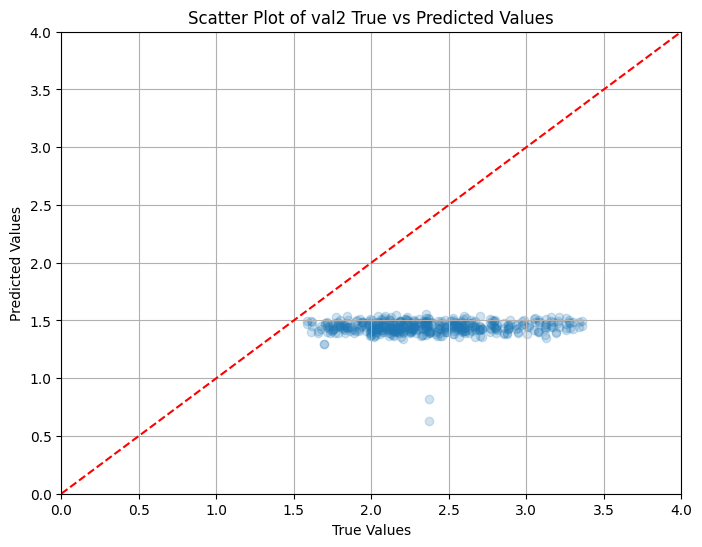

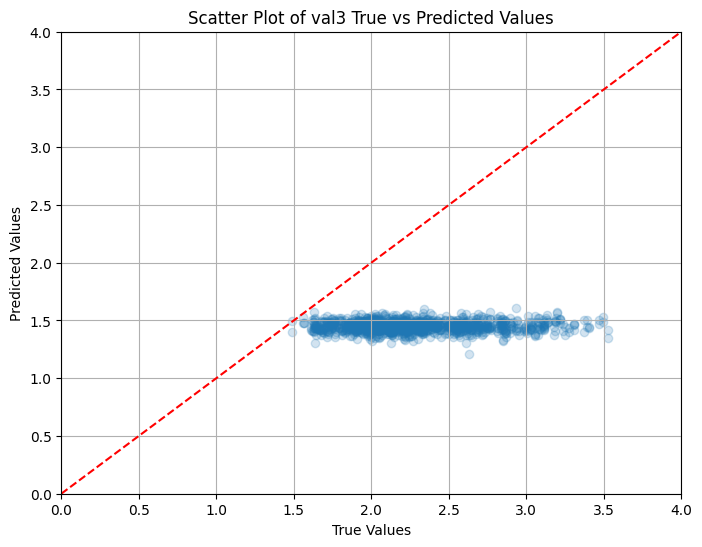

Pearson correlation coefficient: 0.0550, p-value: 0.2317
Spearman correlation coefficient: 0.0635, p-value: 0.1677
Pearson correlation coefficient: 0.0178, p-value: 0.5563
Spearman correlation coefficient: 0.0073, p-value: 0.8089


In [27]:
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/m770s4yw/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

if len(doubled_combined)!=len(pred_df):
    print("Incorrect lengths")

scatter(pred_val2_df[0], doubled_val2_df, 'val2')
scatter(pred_val3_df[0], doubled_val3_df, 'val3')
pearson_spearman(pred_val2_df[0], doubled_val2_df) 
pearson_spearman(pred_val3_df[0], doubled_val3_df) 

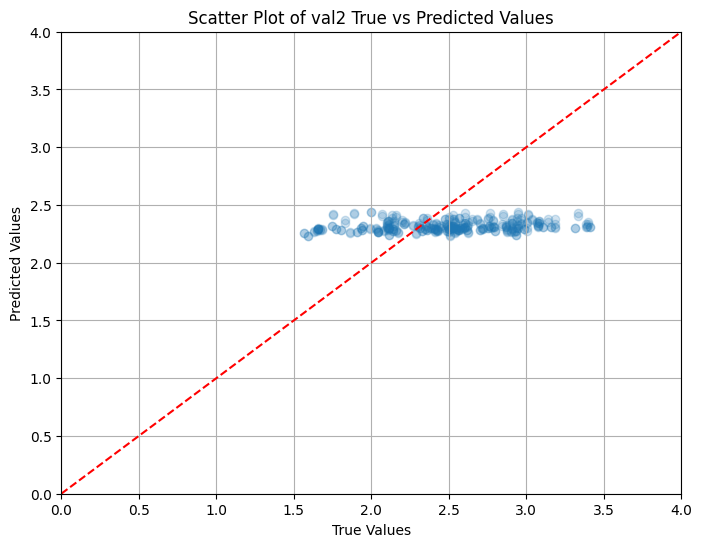

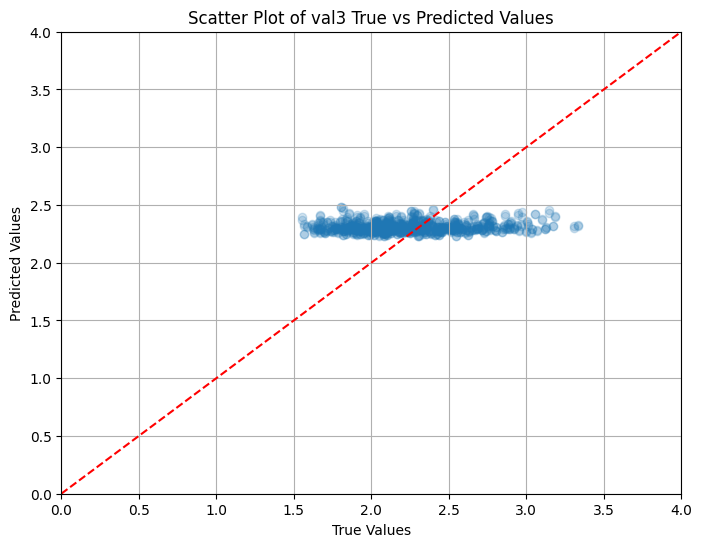

Pearson correlation coefficient: 0.2039, p-value: 0.0002106
Spearman correlation coefficient: 0.2548, p-value: 3.168e-06
Pearson correlation coefficient: 0.1062, p-value: 0.001396
Spearman correlation coefficient: 0.0912, p-value: 0.006106


In [28]:
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/r5ibvwem/activations_cow_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

if len(doubled_combined)!=len(pred_df):
    print("Incorrect lengths")

scatter(pred_val2_df[0], doubled_val2_df, 'val2')
scatter(pred_val3_df[0], doubled_val3_df, 'val3')
pearson_spearman(pred_val2_df[0], doubled_val2_df) 
pearson_spearman(pred_val3_df[0], doubled_val3_df) 

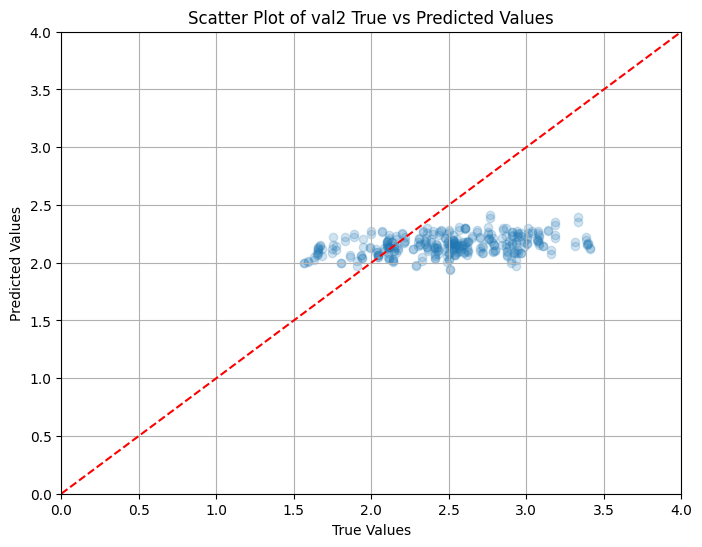

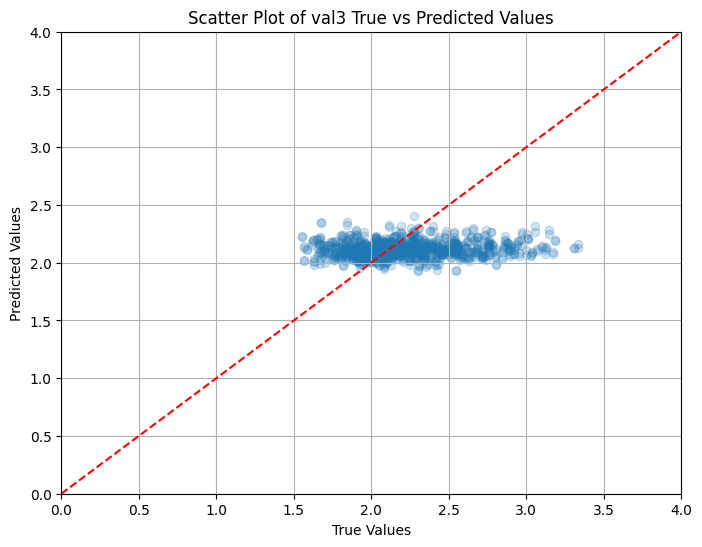

Pearson correlation coefficient: 0.3580, p-value: 2.702e-11
Spearman correlation coefficient: 0.3460, p-value: 1.346e-10
Pearson correlation coefficient: 0.1006, p-value: 0.002477
Spearman correlation coefficient: 0.0965, p-value: 0.003704


In [29]:
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/ylfry2wl/activations_cow_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

if len(doubled_combined)!=len(pred_df):
    print("Incorrect lengths")

scatter(pred_val2_df[0], doubled_val2_df, 'val2')
scatter(pred_val3_df[0], doubled_val3_df, 'val3')
pearson_spearman(pred_val2_df[0], doubled_val2_df) 
pearson_spearman(pred_val3_df[0], doubled_val3_df) 

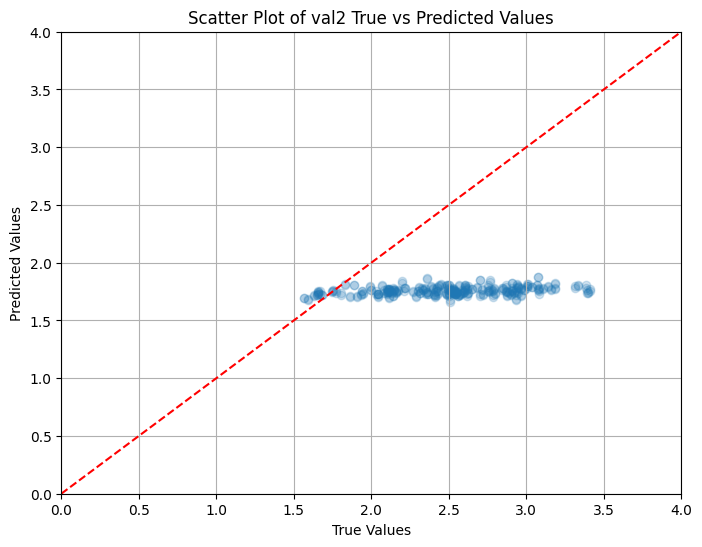

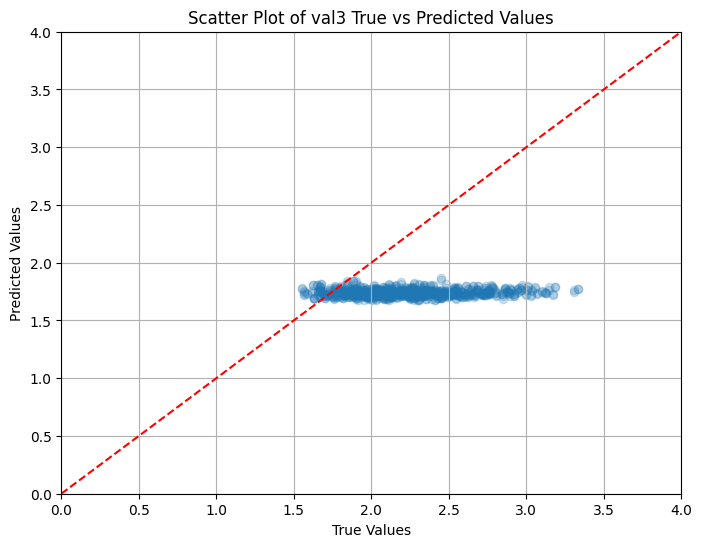

Pearson correlation coefficient: 0.3192, p-value: 3.711e-09
Spearman correlation coefficient: 0.3208, p-value: 3.063e-09
Pearson correlation coefficient: 0.0790, p-value: 0.01759
Spearman correlation coefficient: 0.0718, p-value: 0.03101


In [30]:
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/or2bctq6/activations_cow_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/cow_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

if len(doubled_combined)!=len(pred_df):
    print("Incorrect lengths")

scatter(pred_val2_df[0], doubled_val2_df, 'val2')
scatter(pred_val3_df[0], doubled_val3_df, 'val3')
pearson_spearman(pred_val2_df[0], doubled_val2_df) 
pearson_spearman(pred_val3_df[0], doubled_val3_df) 

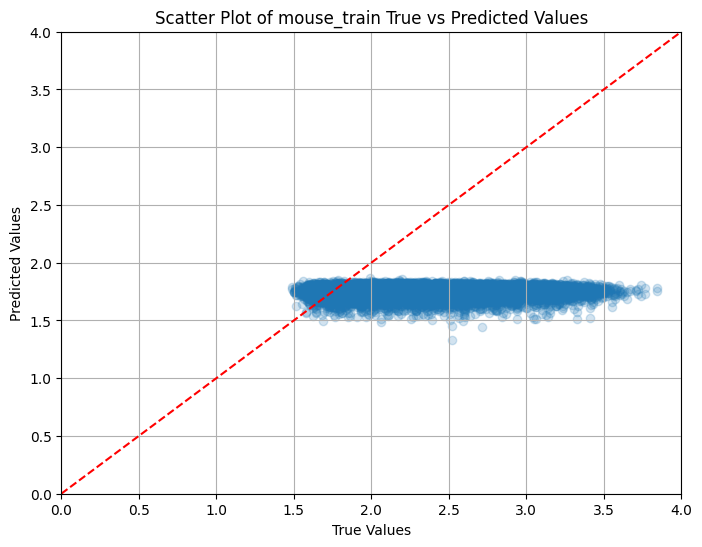

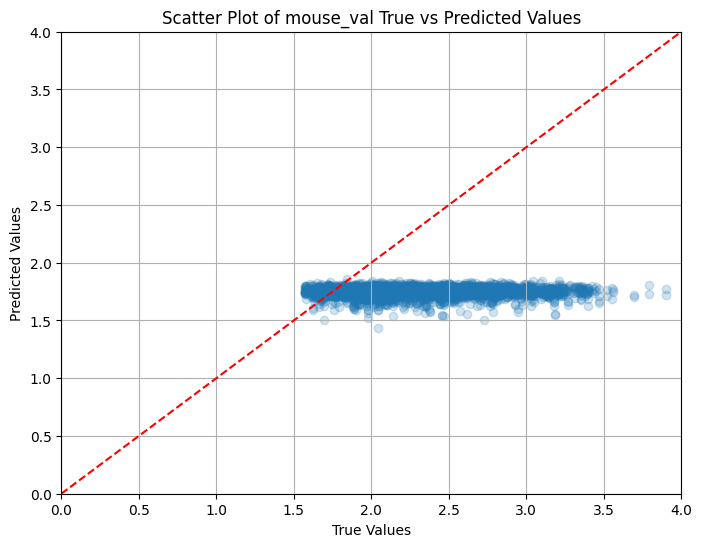

Pearson correlation coefficient: 0.0079, p-value: 0.1667
Spearman correlation coefficient: 0.0153, p-value: 0.007543
Pearson correlation coefficient: 0.0259, p-value: 0.1118
Spearman correlation coefficient: 0.0278, p-value: 0.08819


In [31]:
mouse_pred = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/381jh4pd/activations_mouse_VAL_TRAIN.csv', header=None, sep='\t')
mouse_train_real = pd.read_csv('/home/azstephe/regression_liver/data/sorted_log_20615/splits/mousePos/mouse_liver_TRAINONLY.narrowPeak', header=None, sep='\t')
mouse_val_real = pd.read_csv('/home/azstephe/regression_liver/data/sorted_log_20615/splits/mousePos/mouse_liver_VAL.narrowPeak', header=None, sep='\t')

mouse_val_real_double = pd.concat([mouse_val_real, mouse_val_real]).sort_index(kind='mergesort').reset_index(drop=True)
mouse_train_real_double = pd.concat([mouse_train_real, mouse_train_real]).sort_index(kind='mergesort').reset_index(drop=True)

mouse_val_pred = mouse_pred.head(len(mouse_val_real_double))
mouse_train_pred = mouse_pred.tail(len(mouse_train_real_double))

scatter(mouse_train_pred[0], mouse_train_real_double.iloc[:,4], 'mouse_train')
scatter(mouse_val_pred[0], mouse_val_real_double.iloc[:,4], 'mouse_val')

pearson_spearman(mouse_train_pred[0], mouse_train_real_double.iloc[:,4])
pearson_spearman(mouse_val_pred[0], mouse_val_real_double.iloc[:,4])

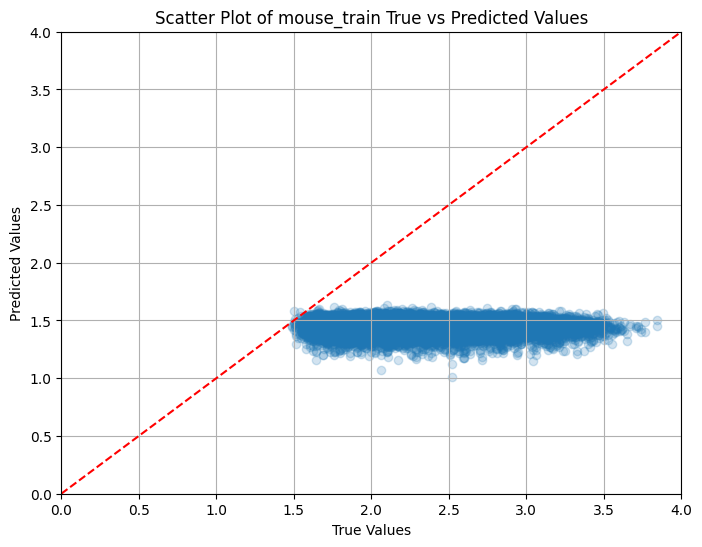

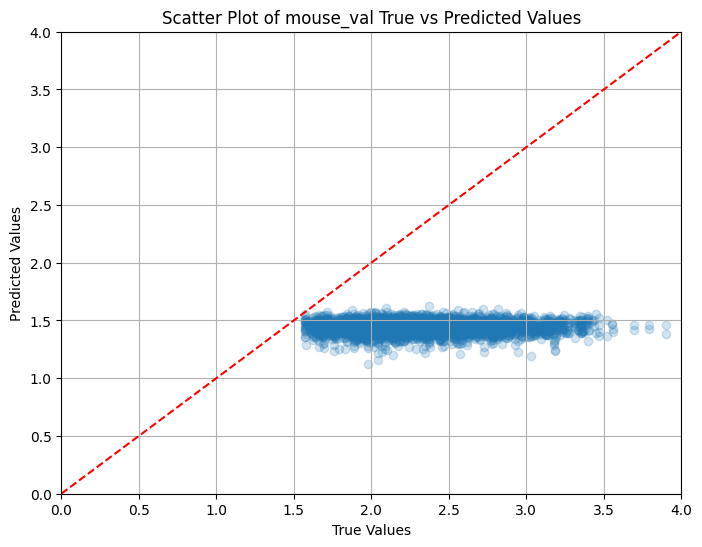

Pearson correlation coefficient: -0.0106, p-value: 0.06432
Spearman correlation coefficient: -0.0058, p-value: 0.3084
Pearson correlation coefficient: 0.0081, p-value: 0.6214
Spearman correlation coefficient: 0.0030, p-value: 0.8554


In [32]:
mouse_pred = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/m770s4yw/activations_mouse_VAL_TRAIN.csv', header=None, sep='\t')
mouse_train_real = pd.read_csv('/home/azstephe/regression_liver/data/sorted_log_20615/splits/mousePos/mouse_liver_TRAINONLY.narrowPeak', header=None, sep='\t')
mouse_val_real = pd.read_csv('/home/azstephe/regression_liver/data/sorted_log_20615/splits/mousePos/mouse_liver_VAL.narrowPeak', header=None, sep='\t')

mouse_val_real_double = pd.concat([mouse_val_real, mouse_val_real]).sort_index(kind='mergesort').reset_index(drop=True)
mouse_train_real_double = pd.concat([mouse_train_real, mouse_train_real]).sort_index(kind='mergesort').reset_index(drop=True)

mouse_val_pred = mouse_pred.head(len(mouse_val_real_double))
mouse_train_pred = mouse_pred.tail(len(mouse_train_real_double))

scatter(mouse_train_pred[0], mouse_train_real_double.iloc[:,4], 'mouse_train')
scatter(mouse_val_pred[0], mouse_val_real_double.iloc[:,4], 'mouse_val')

pearson_spearman(mouse_train_pred[0], mouse_train_real_double.iloc[:,4])
pearson_spearman(mouse_val_pred[0], mouse_val_real_double.iloc[:,4])

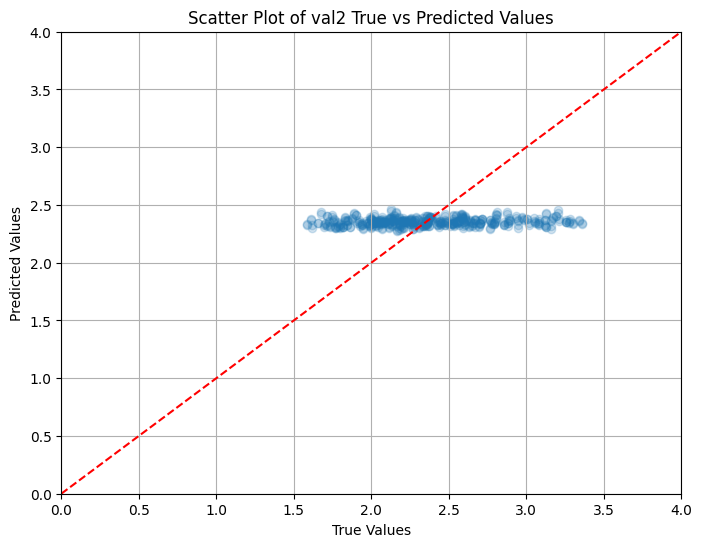

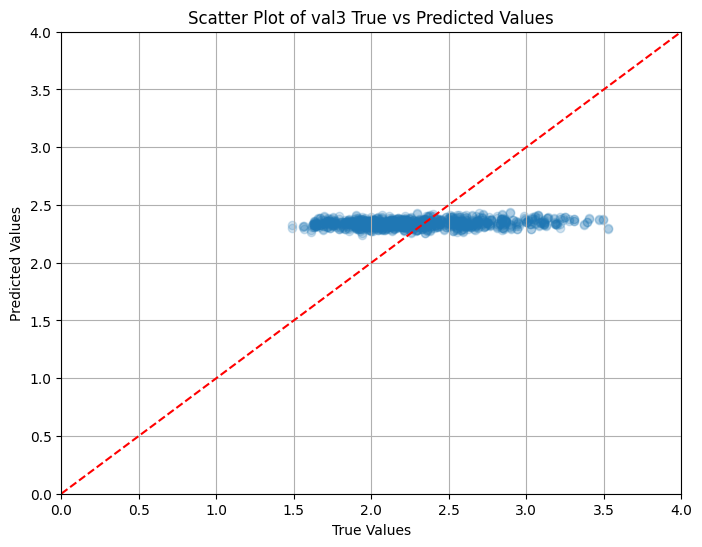

Pearson correlation coefficient: 0.1381, p-value: 0.002593
Spearman correlation coefficient: 0.1415, p-value: 0.002008
Pearson correlation coefficient: 0.1855, p-value: 6.338e-10
Spearman correlation coefficient: 0.1621, p-value: 6.958e-08


In [33]:
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/be5ebl9g/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

if len(doubled_combined)!=len(pred_df):
    print("Incorrect lengths")

scatter(pred_val2_df[0], doubled_val2_df, 'val2')
scatter(pred_val3_df[0], doubled_val3_df, 'val3')
pearson_spearman(pred_val2_df[0], doubled_val2_df) 
pearson_spearman(pred_val3_df[0], doubled_val3_df) 

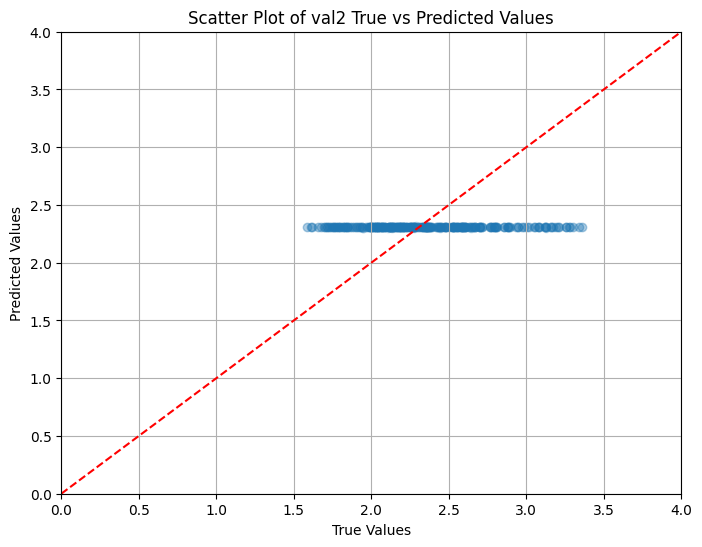

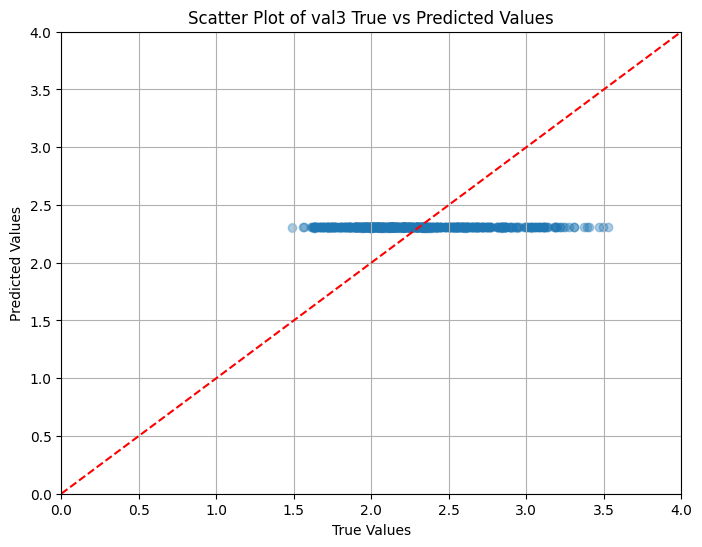

Pearson correlation coefficient: 0.1227, p-value: 0.007464
Spearman correlation coefficient: 0.1240, p-value: 0.006885
Pearson correlation coefficient: 0.0901, p-value: 0.002846
Spearman correlation coefficient: 0.0662, p-value: 0.02849


In [34]:
pred_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/model_outputs/apyuvy7l/activations_macaque_VAL.csv', header=None)
val1_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val1/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val2_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val2/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
val3_df = pd.read_csv('/home/azstephe/liverRegression/regression_liver/data/splits/val3/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]

val1_len = 2*len(val1_df)
val2_len = 2*len(val2_df)
val3_len = 2*len(val3_df)

doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)

pred_val1_df = pred_df.head(val1_len)
pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
pred_val3_df = pred_df.tail(val3_len)

# neg_df = pd.read_csv('../splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
# neg_len = len(neg_df)
# doubled_ndf = pd.DataFrame(np.zeros((neg_len*2, 1)))
doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

if len(doubled_combined)!=len(pred_df):
    print("Incorrect lengths")

scatter(pred_val2_df[0], doubled_val2_df, 'val2')
scatter(pred_val3_df[0], doubled_val3_df, 'val3')
pearson_spearman(pred_val2_df[0], doubled_val2_df) 
pearson_spearman(pred_val3_df[0], doubled_val3_df) 